In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# for roseplot
import plotly.express as px






### Function for binning wind speed data to directional bins

In [119]:
def wind_dir_bin(input, ws_step, wd_bin):
    '''
    input = input file in csv format
    ws_step = step size for wind speed (eg: 10)
    wd_bin = wind direction bin centre (eg: 5)
    '''
    # reading input file to panda dataframe
    df = pd.read_csv(input)

    # defining wind direction bin & bin label
    bins_wd = np.arange(0,360,wd_bin)
    bin_label_wd = wd_bin*np.arange(1,len(bins_wd))

    
    # computing min max wind speed and wind speed bin
    min_ws = df['ws'].min()
    max_ws = df['ws'].max()
    min_binws = np.floor(min_ws/ws_step)
    max_binws = np.ceil(max_ws/ws_step)*ws_step
    bins_ws = np.arange(min_binws, max_binws, ws_step)

    # binning wind direction and wind speed
    df['wd_bin'] = pd.cut(df['wd'], bins = bins_wd, labels=bin_label_wd)
    df['ws_bin'] = pd.cut(df['ws'], bins = bins_ws)

    # Creating output dataframe df_out with count	mean	std	min	25%	50%	75%	max 
    df_tmp1 = df.groupby(['wd_bin','ws_bin'])['ws'].describe()
    # drop 25%, 50%, 75%
    df_tmp2 = df_tmp1.drop(['25%','50%','75%'],axis=1)

    # computing percentage of hits in each bin
    df_tmp2['percent'] = (df_tmp2['count']/df_tmp2['count'].sum())*100

    # Reset index : output for rose diagram
    df_out = df_tmp2.reset_index()
    df_out['bin_centre'] = df_out['wd_bin'].astype('int')

    # returning output
    return(df_out)
    

In [128]:
def roseplot(data, dir, value, category, dir_binsize):
    # ax = ax or plt.gca()
    groups = data.groupby(category)


    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111, projection='polar')
    
    for name, group in groups:
        ax.bar(np.deg2rad(group[dir]), group[value], 
                    width=np.deg2rad(dir_binsize), edgecolor='k', label=name)
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
        ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
        # ax.set_rgrids(np.arange(1, perc.max() + 1, 2), angle=0, weight= 'black')
    
    ax.set_title('Wind Speed Rose Diagram', y=1.10, fontsize=15)
    ax.legend()
    fig.tight_layout()

## Test 1 : step_size = 10, bin_centre = 5

In [121]:
# The data to load
f = "ts_ws_wd_2003_2004.csv"

dfout_bin5 = wind_dir_bin(f,10,5)
dfout_bin5.to_csv('test1_binned_out.csv')
dfout_bin5


,wd_bin,ws_bin,count,mean,std,min,max,percent,bin_centre
0,5,"(0.0, 10.0]",83.0,4.904819,2.057521,0.7,8.8,0.956331,5
1,10,"(0.0, 10.0]",106.0,5.307547,2.141681,1.0,9.1,1.221339,10
2,15,"(0.0, 10.0]",88.0,4.447727,1.685228,0.1,8.3,1.013942,15
3,20,"(0.0, 10.0]",72.0,4.640278,1.486717,1.7,8.5,0.829589,20
4,25,"(0.0, 10.0]",71.0,4.307042,1.790796,0.7,8.8,0.818067,25
...,...,...,...,...,...,...,...,...,...
116,345,"(10.0, 20.0]",11.0,11.145455,0.623480,10.2,12.1,0.126743,345
117,350,"(0.0, 10.0]",98.0,4.941837,2.322455,0.9,9.8,1.129162,350
118,350,"(10.0, 20.0]",13.0,11.369231,0.558845,10.2,12.4,0.149787,350
119,355,"(0.0, 10.0]",65.0,4.490769,1.939936,0.8,8.1,0.748934,355


(<matplotlib.legend.Legend at 0x1f9dd21d390>,
 Text(0.5, 0, 'Binned wind direction'),
 Text(0, 0.5, 'percentage'),
 Text(0.5, 1.0, 'Percentage'))

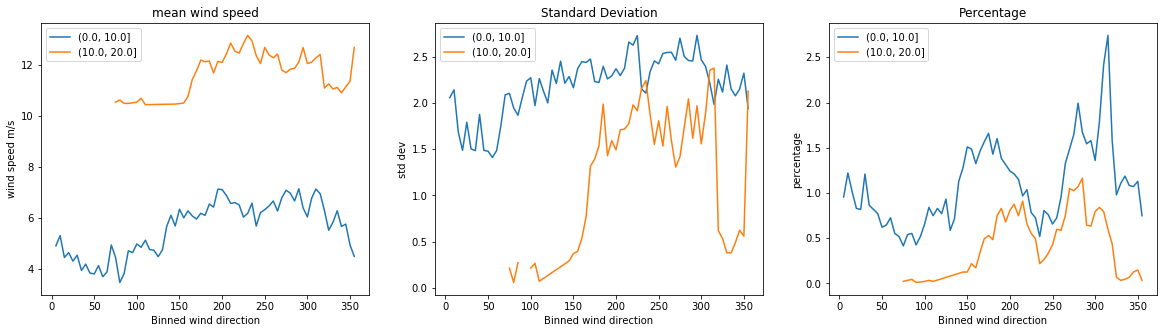

In [123]:
### Plotting mean and std deviation - Test1

groups = dfout_bin5.groupby("ws_bin")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

for name, group in groups:
    ax1.plot(group['bin_centre'], group['mean'], linestyle="-", label= name)
    ax2.plot(group['bin_centre'], group['std'], linestyle="-", label= name)
    ax3.plot(group['bin_centre'], group['percent'], linestyle="-", label= name)

ax1.legend(), ax1.set_xlabel('Binned wind direction'), ax1.set_ylabel('wind speed m/s'), ax1.set_title('mean wind speed')
ax2.legend(), ax2.set_xlabel('Binned wind direction'), ax2.set_ylabel('std dev'), ax2.set_title('Standard Deviation')
ax3.legend(), ax3.set_xlabel('Binned wind direction'), ax3.set_ylabel('percentage'), ax3.set_title('Percentage')


In [124]:

fig = px.bar_polar(dfout_bin5,r='percent', theta='wd_bin',
                   color='ws_bin', template="plotly_dark",
                #    color_discrete_sequence= px.colors.sequential.Plasma_r)
                   color_discrete_sequence= px.colors.sequential.Rainbow_r)
fig.show()
# fig.write_image("test1_binned_out.png")

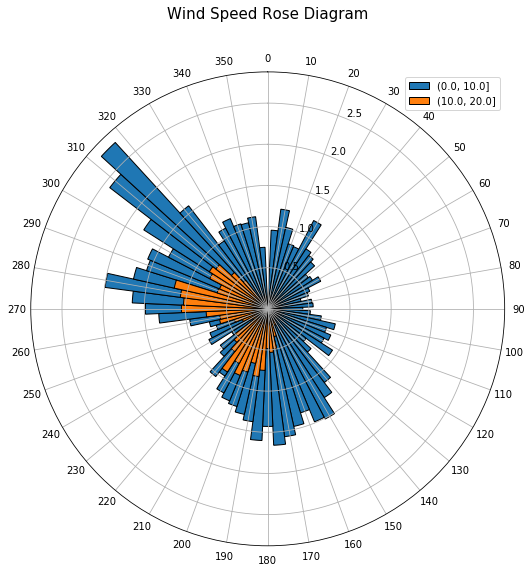

In [136]:
# Plotting Rose plot
ax = roseplot(dfout_bin5, 'bin_centre', 'percent', 'ws_bin', 5)

## Test 2: step_size = 5, bin_centre = 10

In [132]:
dfout_bin10 = wind_dir_bin(f,5,10)
dfout_bin10.to_csv('test2_binned_out.csv')
dfout_bin10.head()

,wd_bin,ws_bin,count,mean,std,min,max,percent,bin_centre
0,10,"(0.0, 5.0]",97.0,3.479381,1.199126,0.7,5.0,1.126466,10
1,10,"(5.0, 10.0]",92.0,6.871739,1.304626,5.1,9.1,1.068401,10
2,20,"(0.0, 5.0]",96.0,3.489583,0.991700,0.1,5.0,1.114853,20
3,20,"(5.0, 10.0]",64.0,6.101562,0.891493,5.1,8.5,0.743235,20
4,30,"(0.0, 5.0]",111.0,3.453153,0.989841,0.7,5.0,1.289049,30


(<matplotlib.legend.Legend at 0x1f9e8af1b38>,
 Text(0.5, 0, 'Binned wind direction'),
 Text(0, 0.5, 'percentage'),
 Text(0.5, 1.0, 'Percentage'))

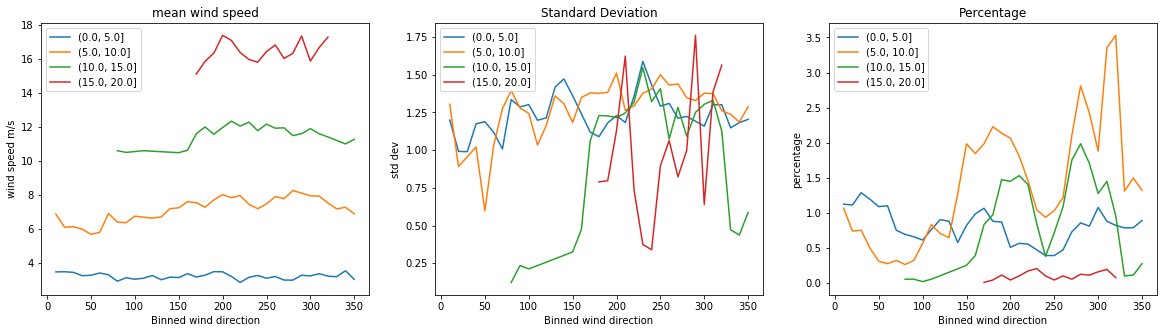

In [133]:
### Plotting mean and std deviation - Test2

groups = dfout_bin10.groupby("ws_bin")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

for name, group in groups:
    ax1.plot(group['bin_centre'], group['mean'], linestyle="-", label= name)
    ax2.plot(group['bin_centre'], group['std'], linestyle="-", label= name)
    ax3.plot(group['bin_centre'], group['percent'], linestyle="-", label= name)

ax1.legend(), ax1.set_xlabel('Binned wind direction'), ax1.set_ylabel('wind speed m/s'), ax1.set_title('mean wind speed')
ax2.legend(), ax2.set_xlabel('Binned wind direction'), ax2.set_ylabel('std dev'), ax2.set_title('Standard Deviation')
ax3.legend(), ax3.set_xlabel('Binned wind direction'), ax3.set_ylabel('percentage'), ax3.set_title('Percentage')


In [61]:
fig = px.bar_polar(dfrose_bin10, r="percent", theta="wd_bin",
                   color="ws_bin", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Rainbow_r)
fig.show()
# fig.write_image("test2_binned_out.png")


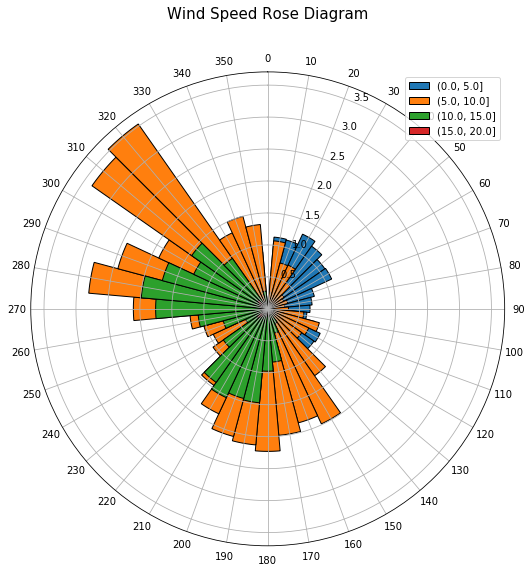

In [135]:
ax = roseplot(dfout_bin10, 'bin_centre', 'percent', 'ws_bin', 10)